In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [23]:
#https://github.com/digipodium/datasets
data_url="https://raw.githubusercontent.com/digipodium/Datasets/main/carsspeed.csv"
df=pd.read_csv(data_url,index_col=0)#index col make first col as index no col
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


In [24]:
df.shape

(50, 2)

now we have to draw graph(scatter plot)

<AxesSubplot:xlabel='speed', ylabel='dist'>

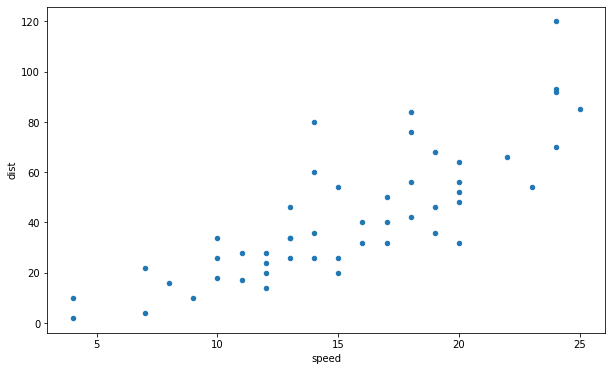

In [25]:

df.plot(x='speed',y='dist',kind='scatter',figsize=(10,6))

distance from the slobe: mse (mean square error) 
line which mse is less (we have to find that)

----------------------Linear regression implementation in scikit-lern--------------------------
STAGES:
1.)DATA LOAD
2.)STORE FEATURE IN X AS 2D
3.)OUTPUT IN Y AS 1D
4.)SPLIT THE DATA INTO 
        1.) TRAINING 70%DATA
        2.) TESTING  30%DATA WE GIVE TESTING PART TO CHECK WHETHER OUR ML ALGO WORKS PROPER PREDICTION OR NOT
5.)CREATE LINEARREGRESSOR OBJECT
6.)FIT THE OBJECT WITH TRAINING DATA
7.)GET THE ACCURACEY USING TEST DATA
8.)CHECK PREDICITON
9.)CREATE GRAPH
-------------------------------------------------------------------------------------------------
TRAIN X, TRAIN Y( FOR FIT)
TEST X, TEST Y(FOR PREDECTION)

In [26]:
#STEP 2(X AND Y)
X=df[['speed']] #2d vector
y=df['dist']    #1d scaler

In [27]:
#step 3 (train test split) it gives 4 chunks
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=1) #it will shuffle the all data and make all varibale content


In [28]:
#step 4 (algo setup)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain) #training the algo

LinearRegression()

In [29]:
#step 5 
# now we find score
score=reg.score(xtest,ytest) *100
print(f"the score is {score}% for ou model")

the score is 61.5910985813624% for ou model


In [30]:
#graphical representation of this data(original data vs predicted data)
df['predictions']=reg.predict(X) #for old data prediction is the new col
df.head()


,speed,dist,predictions
1,4,2,0.218970
2,4,10,0.218970
3,7,4,11.590485
4,7,22,11.590485
5,8,16,15.380990


<AxesSubplot:xlabel='speed', ylabel='dist'>

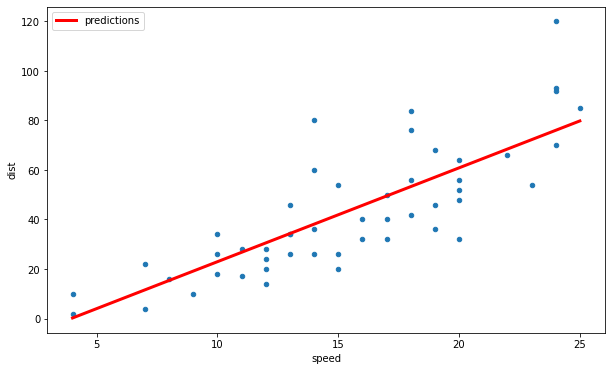

In [42]:
#plotting previous data graph and predictable graph in one graph(overlap)
ax=df.plot(kind='scatter',x='speed',y='dist',figsize=(10,6))
df.plot(x='speed',y='predictions',ax=ax,color='red',linewidth=3)

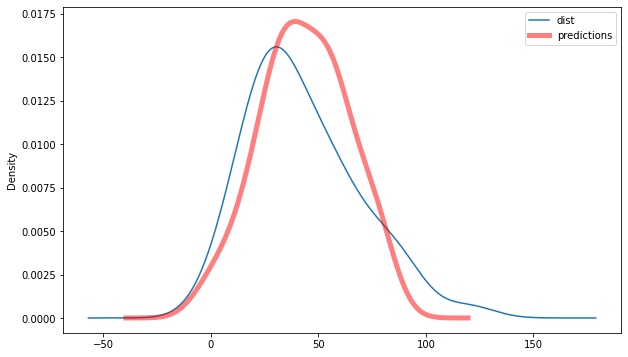

In [32]:
#SECOND WAY TO PLOT THE GRAPH
#kde (kernal densitty)
ax=df.plot(kind='kde',x='speed',y='dist',figsize=(10,6))
df.plot(kind='kde',x='speed',y='predictions',ax=ax,color='red',alpha=.5,linewidth=5) #alpha is for transparency
plt.show()


:MeTRICS: FOR MODEL EVALUATION (IT CHECKS OUR MODEL IS BEST OR NOT)

1.) R-squared value





In [33]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [34]:
r2_score(df.dist,df.predictions) #finds accuracy(orignal data, predicted value data)


0.6499193875395108

In [35]:
mean_absolute_error(df.dist,df.predictions) #+-11 ki gadbadi ho skti h

11.579285643417004

In [36]:
mean_squared_error(df.dist,df.predictions)

227.8253209447922

MODEL SAVING

In [37]:
from joblib import dump #for dumping the data to a file

In [38]:
dump(reg,"faltu_model_v1.pkl")

['faltu_model_v1.pkl']

In [39]:
del reg

In [40]:
reg

NameError: name 'reg' is not defined

loading model

In [ ]:
from joblib import load

In [ ]:
reg=load("faltu_model_v1.pkl")

In [ ]:
reg.predict([[12],[24]])

C:\Users\ASUS\miniconda3\envs\digi1\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30.54301022, 76.02907034])